# Exercises
#### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.

In [1]:
#standard ds
import pandas as pd
import numpy as np

#viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#my env file
import env

import wrangle_zillow as w

## Acquire

In [2]:
df = w.wrangle_zillow()

--- Shape: (77380, 68)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet

In [3]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
5,1447245,17143294,2.0,3.0,NaN,2.0,1492.0,1492.0,6111.0,2.0,...,198640.0,331064.0,2016.0,132424.0,3508.10,6.111005e+13,-0.020526,2017-01-01,NaN,Condominium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60178 entries, 1 to 77379
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            60178 non-null  int64  
 1   parcelid                      60178 non-null  int64  
 2   bathroomcnt                   60178 non-null  float64
 3   bedroomcnt                    60178 non-null  float64
 4   buildingqualitytypeid         47079 non-null  float64
 5   calculatedbathnbr             60153 non-null  float64
 6   calculatedfinishedsquarefeet  60177 non-null  float64
 7   finishedsquarefeet12          59032 non-null  float64
 8   fips                          60178 non-null  float64
 9   fullbathcnt                   60153 non-null  float64
 10  heatingorsystemtypeid         48582 non-null  float64
 11  latitude                      60178 non-null  float64
 12  longitude                     60178 non-null  float64
 13  l

In [5]:
# these two features are almost the exact same! Will drop calculatedbathnbr later, redundant.
(df.bathroomcnt == df.calculatedbathnbr).sum()

60153

In [6]:
# these two features are the exact same! Will drop finishedsquarefeet12 later, redundant.
(df.calculatedfinishedsquarefeet == df.finishedsquarefeet12).sum()

59032

In [7]:
# these two features are almost the exact same! Will drop fullbathcnt later, redundant.
(df.bathroomcnt == df.fullbathcnt).sum()

54877

#### Lets understand our target value

In [8]:
df.logerror.min()

-4.65542037764

In [9]:
df.logerror.max()

5.2629986498

The log error is the difference between the actual sales price and the predicted sales price expressed as the logarithm of the ratio of the actual sales price to the predicted sales price.

A log error of zero indicates that the predicted sales price was exactly the same as the actual sales price, while a positive log error indicates that the predicted sales price was lower than the actual sales price, and a negative log error indicates that the predicted sales price was higher than the actual sales price.

The use of log errors is a way to measure the accuracy of the mathematical models used in predicting property values. The lower the log error, the more accurate the model is considered to be. Real estate professionals use log error analysis to assess the reliability of automated valuation models and other data-driven tools used in the industry.

## Prepare

In [10]:
df = df[df.propertylandusetypeid == (261 or 279)]

In [11]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           10412
calculatedbathnbr                   9
calculatedfinishedsquarefeet        0
finishedsquarefeet12                8
fips                                0
fullbathcnt                         9
heatingorsystemtypeid            9785
latitude                            0
longitude                           0
lotsizesquarefeet                 262
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              10363
rawcensustractandblock              0
regionidcity                      546
regionidcounty                      0
regionidzip                         4
roomcnt                             0
unitcnt                         10327
yearbuilt                          19
structuretaxvaluedollarcnt         39
taxvaluedollarcnt                   0
assessmentye

In [12]:
# Even though we have filtered properties listed as single family homes, 
#  there's still properties with multiple units
df.unitcnt.value_counts()

1.0    33001
2.0       17
3.0        1
Name: unitcnt, dtype: int64

In [13]:
df = df[df.unitcnt == 1]

In [14]:
df.shape

(33001, 34)

In [15]:
df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           113
calculatedbathnbr                 3
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       3
heatingorsystemtypeid            61
latitude                          0
longitude                         0
lotsizesquarefeet               251
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               64
rawcensustractandblock            0
regionidcity                    478
regionidcounty                    0
regionidzip                       2
roomcnt                           0
unitcnt                           0
yearbuilt                         2
structuretaxvaluedollarcnt       38
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt       

In [16]:
def remove_outliers(df,feature_list):
    ''' utilizes IQR to remove data which lies beyond 
    three standard deviations of the mean
    '''
    for feature in feature_list:
    
        #define interquartile range
        Q1= df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        #Set limits
        upper_limit = Q3 + 3 * IQR
        lower_limit = Q1 - 3 * IQR
        #remove outliers
        df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

    return df

In [17]:
df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc'],
      dtype='object')

In [18]:
feature_list = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
               'finishedsquarefeet12', 'fullbathcnt', 'lotsizesquarefeet', 'rawcensustractandblock', 
               'roomcnt', 'unitcnt', 'yearbuilt','assessmentyear','landtaxvaluedollarcnt', 
               'taxamount', 'censustractandblock']

In [19]:
remove_outliers(df,feature_list)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc


In [20]:
df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           113
calculatedbathnbr                 3
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       3
heatingorsystemtypeid            61
latitude                          0
longitude                         0
lotsizesquarefeet               251
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               64
rawcensustractandblock            0
regionidcity                    478
regionidcounty                    0
regionidzip                       2
roomcnt                           0
unitcnt                           0
yearbuilt                         2
structuretaxvaluedollarcnt       38
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt       

In [21]:
#rechecking to ensure no duplicates, I can drop this 
(df.id.value_counts() == 2).sum()

0

In [22]:
# all single unit properties, I can drop this
df.unitcnt.value_counts()

1.0    33001
Name: unitcnt, dtype: int64

In [23]:
# almost all are '0', this is nonsenical data. 

df.roomcnt.value_counts()

0.0    32998
8.0        1
6.0        1
5.0        1
Name: roomcnt, dtype: int64

In [24]:
#everything assesed in 2016, I can drop this

df.assessmentyear.value_counts()

2016.0    33001
Name: assessmentyear, dtype: int64

In [25]:
#all are single family, I can drop this

df.propertylandusedesc.value_counts()

Single Family Residential    33001
Name: propertylandusedesc, dtype: int64

In [26]:
# only 3 are unique, this is redundant I can drop this.

df.regionidcounty.value_counts()

3101.0    32998
1286.0        3
Name: regionidcounty, dtype: int64

In [27]:
#this col is missing 478 values but may be a good driver of the target value
df.regionidcity.value_counts()

12447.0    11116
5534.0      1760
40227.0     1485
46298.0     1413
54311.0      871
           ...  
16764.0        1
10608.0        1
10815.0        1
41673.0        1
21395.0        1
Name: regionidcity, Length: 128, dtype: int64

In [28]:
# We have rawcensustractandblock with 0 nulls and censustractandblock with 34 nulls. 
# Because my reseach showed me that the raw census tract would be less valuable for this 
# objective, we will vreate a function that will fill nulls in the prefered column from
# the raw values in the raw value column, after, we will drop raw value column.

def fill_null_with_corresponding_value(df, col1, col2):
    """
    Fills null values in column2 with corresponding non-null values from column1 in a pandas DataFrame
    """
    df_copy = df.copy()  # make a copy of the original dataframe to avoid modifying it
    df_copy[col2].fillna(df_copy[col1], inplace=True)  # fill null values in column2 with corresponding values from column1
    return df_copy


In [29]:
df = fill_null_with_corresponding_value(df, col1='rawcensustractandblock', col2='censustractandblock')

In [30]:
df.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           113
calculatedbathnbr                 3
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       3
heatingorsystemtypeid            61
latitude                          0
longitude                         0
lotsizesquarefeet               251
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               64
rawcensustractandblock            0
regionidcity                    478
regionidcounty                    0
regionidzip                       2
roomcnt                           0
unitcnt                           0
yearbuilt                         2
structuretaxvaluedollarcnt       38
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt       

In [31]:
# drop reduundant or non-usefull columns

cols_to_drop = ['id','parcelid','calculatedbathnbr','finishedsquarefeet12',
                'fullbathcnt','unitcnt','rawcensustractandblock','propertyzoningdesc',
                'regionidcity','heatingorsystemtypeid', 'propertylandusetypeid', 
                'regionidzip', 'assessmentyear', 'propertylandusedesc', 
                'regionidcounty', 'roomcnt']

df = df.drop(columns = cols_to_drop)

In [32]:
df.isnull().sum()

bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           113
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               251
propertycountylandusecode         0
yearbuilt                         2
structuretaxvaluedollarcnt       38
taxvaluedollarcnt                 0
landtaxvaluedollarcnt             0
taxamount                         2
censustractandblock               0
logerror                          0
transactiondate                   0
heatingorsystemdesc              61
dtype: int64

#### Lets look at each col with nulls to see how we will handle them

In [33]:
df.buildingqualitytypeid.value_counts()

# Missing 113, values are 1-12, we will impute with mode

6.0     10128
8.0      8169
4.0      7890
7.0      3383
5.0      1296
9.0      1115
11.0      512
10.0      223
3.0        89
12.0       78
1.0         5
Name: buildingqualitytypeid, dtype: int64

In [34]:
df.lotsizesquarefeet.value_counts()

# Missing 251, tons of different values, we will impute with mean

5000.0     144
6000.0      89
7499.0      88
7500.0      80
5999.0      79
          ... 
40907.0      1
65125.0      1
16781.0      1
2527.0       1
47405.0      1
Name: lotsizesquarefeet, Length: 11800, dtype: int64

In [35]:
df.structuretaxvaluedollarcnt.value_counts()

# Missing 38, tons of different values, we will impute with mean

100000.0    43
200000.0    30
90000.0     30
32489.0     27
95000.0     24
            ..
518378.0     1
180459.0     1
89068.0      1
109665.0     1
32797.0      1
Name: structuretaxvaluedollarcnt, Length: 21976, dtype: int64

In [36]:
df.heatingorsystemdesc.value_counts()

# 3 different values, we will impute with mode

Central       20541
Floor/Wall    12333
Solar            66
Name: heatingorsystemdesc, dtype: int64

In [37]:
df.taxamount.value_counts()

# missing 2 values, impute with mean

1449.99     3
1625.61     3
3760.56     3
2914.16     3
4012.74     3
           ..
6751.78     1
10542.35    1
4907.85     1
5739.12     1
6317.15     1
Name: taxamount, Length: 32489, dtype: int64

In [38]:
df.yearbuilt.value_counts()

# missing 2 values, impute with mean

1950.0    1440
1955.0    1306
1953.0    1276
1954.0    1176
1952.0    1071
          ... 
1892.0       1
1878.0       1
1882.0       1
1894.0       1
2016.0       1
Name: yearbuilt, Length: 131, dtype: int64

In [39]:
def mean_impute_columns(df, column_names):
    """
    Applies mode imputation to fill null values in specific columns of a pandas DataFrame
    """
    for column_name in column_names:
        mean_value = df[column_name].mean()
        df[column_name].fillna(mean_value, inplace=True)
    return df

In [40]:
cols_to_impute_mean = ['lotsizesquarefeet','structuretaxvaluedollarcnt', 'yearbuilt']

In [41]:
df = mean_impute_columns(df, column_names=cols_to_impute_mean)

In [42]:
def mode_impute_columns(df, column_names):
    """
    Applies mode imputation to fill null values in specific columns of a pandas DataFrame
    """
    for column_name in column_names:
        mode_value = df[column_name].mode().iloc[0]
        df[column_name].fillna(mode_value, inplace=True)
    return df

In [43]:
cols_to_impute_mode = ['buildingqualitytypeid','heatingorsystemdesc']

In [44]:
df = mode_impute_columns(df, column_names=cols_to_impute_mode)

In [45]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       2
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
dtype: int64

In [46]:
# since theres only 2 with nulls, and im not too comfortable imputing taxamount, I will drop these two. 

df[df['taxamount'].isnull()]

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc
5334,3.0,4.0,7.0,2587.0,6037.0,34048939.0,-118544920.0,9775.000000,0104,1954.0,448740.000000,2030499.0,1581759.0,NaN,6.037263e+13,-0.043649,2017-01-25,Central
12330,3.0,4.0,9.0,2924.0,6037.0,34070466.0,-118462732.0,11069.506656,0101,1954.0,186721.813791,461231.0,461231.0,NaN,6.037265e+13,0.038192,2017-02-24,Central


In [47]:
df = df.dropna()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32999 entries, 3 to 77379
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   32999 non-null  float64
 1   bedroomcnt                    32999 non-null  float64
 2   buildingqualitytypeid         32999 non-null  float64
 3   calculatedfinishedsquarefeet  32999 non-null  float64
 4   fips                          32999 non-null  float64
 5   latitude                      32999 non-null  float64
 6   longitude                     32999 non-null  float64
 7   lotsizesquarefeet             32999 non-null  float64
 8   propertycountylandusecode     32999 non-null  object 
 9   yearbuilt                     32999 non-null  float64
 10  structuretaxvaluedollarcnt    32999 non-null  float64
 11  taxvaluedollarcnt             32999 non-null  float64
 12  landtaxvaluedollarcnt         32999 non-null  float64
 13  t

### Nulls gone, lets change out dtypes and rename cols:

In [49]:
def convert_to_object_dtype(df, columns):
    """
    Convert specified columns in a pandas DataFrame to object dtype
    """
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype('object')
    return df

In [50]:
cols_to_obj = ['fips','hvac_type', 'propertylandusedesc','buildingqualitytypeid']

df = convert_to_object_dtype(df, columns = cols_to_obj)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32999 entries, 3 to 77379
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   32999 non-null  float64
 1   bedroomcnt                    32999 non-null  float64
 2   buildingqualitytypeid         32999 non-null  object 
 3   calculatedfinishedsquarefeet  32999 non-null  float64
 4   fips                          32999 non-null  object 
 5   latitude                      32999 non-null  float64
 6   longitude                     32999 non-null  float64
 7   lotsizesquarefeet             32999 non-null  float64
 8   propertycountylandusecode     32999 non-null  object 
 9   yearbuilt                     32999 non-null  float64
 10  structuretaxvaluedollarcnt    32999 non-null  float64
 11  taxvaluedollarcnt             32999 non-null  float64
 12  landtaxvaluedollarcnt         32999 non-null  float64
 13  t

In [52]:
#rename cols to promote readability
df = df.rename(columns={'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms', 
                        'buildingqualitytypeid': 'quality_id', 'calculatedfinishedsquarefeet': 'sqft',
                        'fips': 'county', 'lotsizesquarefeet': 'lot_sqft',
                        'propertycountylandusecode': 'prop_use_code', 'yearbuilt': 'year_built',
                        'structuretaxvaluedollarcnt': 'structure_value', 'taxvaluedollarcnt': 'home_value',
                        'censustractandblock': 'tract&block', 'transactiondate': 'txn_date',
                        'heatingorsystemdesc': 'hvac_type', 'landtaxvaluedollarcnt': 'land_value'})

In [53]:
# convert fip code to county name
df['county'] = df['county'].replace({6037.0: 'los_angeles', 6059.0: 'orange', 6111.0: 'ventura'})

In [54]:
df.head()

,bathrooms,bedrooms,quality_id,sqft,county,latitude,longitude,lot_sqft,prop_use_code,year_built,structure_value,home_value,land_value,taxamount,tract&block,logerror,txn_date,hvac_type
3,3.0,4.0,8.0,2376.0,los_angeles,34245180.0,-118240722.0,13038.0,0101,1970.0,108918.0,145143.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central
6,3.0,4.0,9.0,2962.0,los_angeles,34145202.0,-118179824.0,63000.0,0101,1950.0,276684.0,773303.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central
8,3.0,4.0,9.0,3039.0,los_angeles,33960230.0,-118006914.0,20028.0,0100,1970.0,177527.0,220583.0,43056.0,3104.19,6.037500e+13,-0.040966,2017-01-02,Central
10,3.0,4.0,8.0,2540.0,los_angeles,34434971.0,-118464390.0,10384.0,0101,1999.0,271715.0,430108.0,158393.0,6103.36,6.037920e+13,0.005963,2017-01-02,Central
18,1.0,2.0,4.0,1146.0,los_angeles,34024040.0,-118159090.0,4657.0,0100,1939.0,127960.0,273745.0,145785.0,3739.02,6.037532e+13,-0.035085,2017-01-02,Floor/Wall


In [55]:
def split_zillow(df):
    '''
    split_zillow will take in a single pandas df referencing a cleaned
    version of zillow data, and will then split the data into train,
    validate, and test sets stratifying on home_value
    
    Arguments: df. a pandas dataframe
    return: train, validate, test: the pandas df split from orginal df 
    '''
    train_val, test = train_test_split(df, random_state = 828, train_size = 0.8)
    train, validate = train_test_split(train_val, random_state = 828, train_size = 0.7)
    return train, validate, test

In [56]:
train, validate, test = split_zillow(df)

In [57]:
train.shape, validate.shape, test.shape

((18479, 18), (7920, 18), (6600, 18))

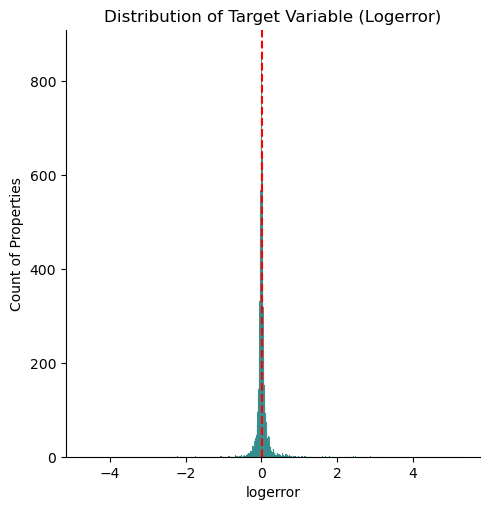

In [58]:

# Make the Plot
target = sns.displot(train['logerror'],color='teal')
target.set_axis_labels("logerror", "Count of Properties")
target.set(title='Distribution of Target Variable (Logerror)')
# add a vertical line for the mean of the 'home_value' column
mean_value = train['logerror'].mean()
plt.axvline(mean_value, color='r', linestyle='--')
plt.show()

In [59]:
df.columns

Index(['bathrooms', 'bedrooms', 'quality_id', 'sqft', 'county', 'latitude',
       'longitude', 'lot_sqft', 'prop_use_code', 'year_built',
       'structure_value', 'home_value', 'land_value', 'taxamount',
       'tract&block', 'logerror', 'txn_date', 'hvac_type'],
      dtype='object')

In [60]:
feats_to_scale = ['bathrooms', 'bedrooms', 'sqft','lot_sqft', 'year_built',
                  'structure_value', 'home_value', 'land_value', 'taxamount']

cols_scaled = [col + '_scaled' for col in feats_to_scale]

df[cols_scaled] = MinMaxScaler().fit_transform(df[feats_to_scale])

In [61]:
df.head()

,bathrooms,bedrooms,quality_id,sqft,county,latitude,longitude,lot_sqft,prop_use_code,year_built,...,hvac_type,bathrooms_scaled,bedrooms_scaled,sqft_scaled,lot_sqft_scaled,year_built_scaled,structure_value_scaled,home_value_scaled,land_value_scaled,taxamount_scaled
3,3.0,4.0,8.0,2376.0,los_angeles,34245180.0,-118240722.0,13038.0,0101,1970.0,...,Central,0.230769,0.363636,0.102126,0.004285,0.666667,0.011865,0.005679,0.001615,0.005695
6,3.0,4.0,9.0,2962.0,los_angeles,34145202.0,-118179824.0,63000.0,0101,1950.0,...,Central,0.230769,0.363636,0.129035,0.021934,0.521739,0.030170,0.030429,0.022227,0.032300
8,3.0,4.0,9.0,3039.0,los_angeles,33960230.0,-118006914.0,20028.0,0100,1970.0,...,Central,0.230769,0.363636,0.132571,0.006754,0.666667,0.019351,0.008652,0.001920,0.010256
10,3.0,4.0,8.0,2540.0,los_angeles,34434971.0,-118464390.0,10384.0,0101,1999.0,...,Central,0.230769,0.363636,0.109657,0.003347,0.876812,0.029628,0.016907,0.007084,0.020567
18,1.0,2.0,4.0,1146.0,los_angeles,34024040.0,-118159090.0,4657.0,0100,1939.0,...,Floor/Wall,0.076923,0.181818,0.045644,0.001324,0.442029,0.013942,0.010746,0.006520,0.012439


In [63]:
df.columns

Index(['bathrooms', 'bedrooms', 'quality_id', 'sqft', 'county', 'latitude',
       'longitude', 'lot_sqft', 'prop_use_code', 'year_built',
       'structure_value', 'home_value', 'land_value', 'taxamount',
       'tract&block', 'logerror', 'txn_date', 'hvac_type', 'bathrooms_scaled',
       'bedrooms_scaled', 'sqft_scaled', 'lot_sqft_scaled',
       'year_built_scaled', 'structure_value_scaled', 'home_value_scaled',
       'land_value_scaled', 'taxamount_scaled'],
      dtype='object')

In [64]:
scaled_cols = ['bathrooms_scaled','bedrooms_scaled', 'sqft_scaled', 
               'lot_sqft_scaled','year_built_scaled', 'structure_value_scaled', 
               'home_value_scaled','land_value_scaled', 'taxamount_scaled']

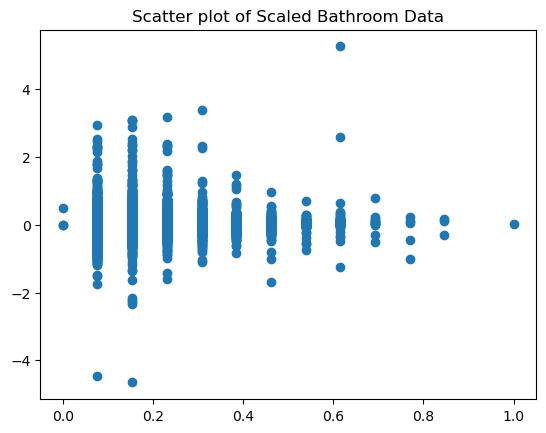

In [70]:
# plot the scaled data
plt.scatter(df.bathrooms_scaled, df.logerror)
plt.title('Scatter plot of Scaled Bathroom Data')
plt.show()

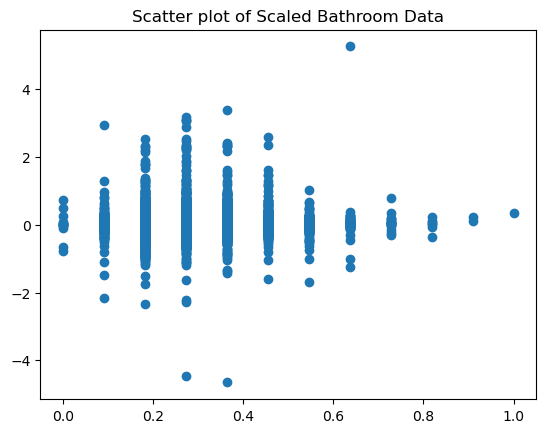

In [71]:
# plot the scaled data
plt.scatter(df.bedrooms_scaled, df.logerror)
plt.title('Scatter plot of Scaled Bathroom Data')
plt.show()